### Полиномиальная регрессия. Как из линейной регрессии сделать криволинейную?

Линейная модель (прямая линия):
![img](http://neerc.ifmo.ru/wiki/images/f/f0/Linear_regression_example.png)

***А что если нельзя провести оптимальную прямую линию?***
<a href="https://ibb.co/XXBwvBP"><img src="https://i.ibb.co/Wn9TY9X/9.jpg" alt="9" border="0"></a>

Нужно использовать нелинейную модель:
![img](https://www.machinelearningmastery.ru/img/0-399364-636329.png)

***Модель полиномиальной регрессии (polynomial regression)*** - это обобщенная линейная модель с параметризованной степенью многочлена.

![img](https://russianblogs.com/images/753/361716febc5a15ae65cdba4394db1f69.png)

Многочлен 1-й степени:

$$ y=ax+b $$ 

Многочлен 3-й степени:
$$ y = ax^3 + bx^2 + cx + d $$

Несмотря на то, что мы можем использовать полиномиальную регрессию для моделирования нелинейных связей, она по-прежнему рассматривается как модель множественной линейной регрессии, ввиду 
линейных коэффициентов регрессии.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures  # Класс преобразователь

[Ссылка на документацию](https://scikit-learn.org/stable/modules/preprocessing.html#polynomial-features)

In [2]:
# Моделируем данные
X = np.array([258.0, 270.0, 294.0, 320.0, 342.0, 368.0, 396.0, 446.0, 480.0, 586.0])[:, np.newaxis]
y = np.array([236.4, 234.4, 252.8, 298.6, 314.2, 342.2, 360.8, 368.0, 391.2, 390.8])

In [3]:
X

array([[258.],
       [270.],
       [294.],
       [320.],
       [342.],
       [368.],
       [396.],
       [446.],
       [480.],
       [586.]])

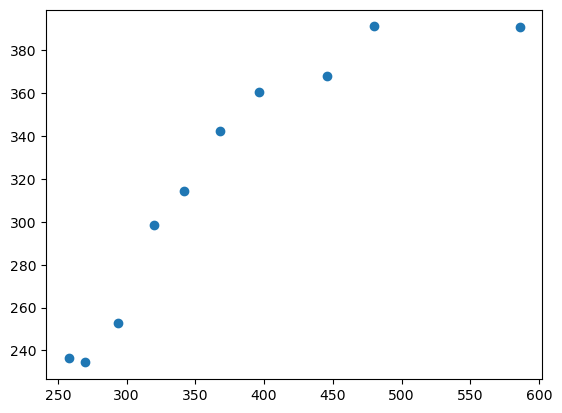

In [4]:
plt.scatter(X, y) 

In [5]:
lr = LinearRegression() # Линейная регрессия
lr.fit(X, y) # Обучим линейную регрессию

LinearRegression()

In [6]:
X_ = np.arange(250, 600, 10)[:, np.newaxis] # Точки для предсказания
y_lr = lr.predict(X_) # Предсказываем y для линейной регрессии

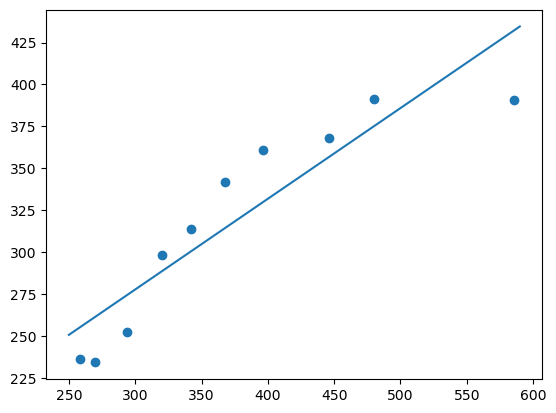

In [7]:
plt.scatter(X, y) 
plt.plot(X_, y_lr) 

In [8]:
pr = LinearRegression() # Полиномиальная регрессия

In [9]:
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)       # Преобразуем данные

Т.е., если исходный вектор признаков $X=[x_1,x_2]$, то при `degree=2` буду добавлены полиномиальные признаки: $x_1, x_2, x_1^2, x_2^2, x_1*x_2$. Такое преобразование позволяет учитывать нелинейные зависимости между признаками.

In [10]:
X_quad

array([[1.00000e+00, 2.58000e+02, 6.65640e+04],
       [1.00000e+00, 2.70000e+02, 7.29000e+04],
       [1.00000e+00, 2.94000e+02, 8.64360e+04],
       [1.00000e+00, 3.20000e+02, 1.02400e+05],
       [1.00000e+00, 3.42000e+02, 1.16964e+05],
       [1.00000e+00, 3.68000e+02, 1.35424e+05],
       [1.00000e+00, 3.96000e+02, 1.56816e+05],
       [1.00000e+00, 4.46000e+02, 1.98916e+05],
       [1.00000e+00, 4.80000e+02, 2.30400e+05],
       [1.00000e+00, 5.86000e+02, 3.43396e+05]])

In [11]:
pr.fit(X_quad, y) # Обучаем полиномиальную регрессию

LinearRegression()

In [12]:
y_pr = pr.predict(quadratic.fit_transform(X_)) # Предсказываем y для полиномиальной регрессии

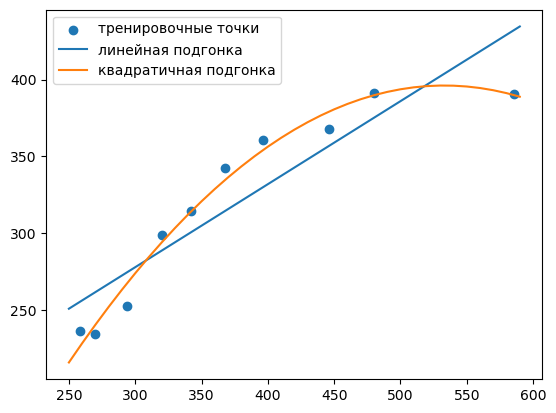

In [13]:
plt.scatter(X, y, label = 'тренировочные точки') 
plt.plot(X_, y_lr, label = 'линейная подгонка') 
plt.plot(X_, y_pr, label = 'квадратичная подгонка') 
plt.legend(loc='upper left') 
plt.show()

### Задание 1. Оцените полученные модели с помощью коэффициента детерминации и MSE. Что можно сказать о качестве моделей?

Замечание!!! mean_squared_error принимает 1-м аргументом истинные значения y, а 2-м предсказанные (см. документацию!). 
Получается, для линейной регрессии:

In [36]:
from sklearn.metrics import mean_squared_error

print('R^2 для линейной регрессии: ', round(lr.score(X, y),2))

# Для наших синих точек 
y_pred = lr.predict(X)
print('MSE для линейной регрессии:', round(mean_squared_error(y, y_pred),2))

# Аналогично выполните для полиномиальной модели и сравните результат

print('R^2 для полиномиальной регрессии: ', round(pr.score(quadratic.fit_transform(X),y),2))
y_pred_pr = pr.predict(quadratic.fit_transform(X))
print('MSE для полиномиальной регрессии: ', round(mean_squared_error(y, y_pred_pr),2))

R^2 для линейной регрессии:  0.83
MSE для линейной регрессии: 569.78
R^2 для полиномиальной регрессии:  0.98
MSE для полиномиальной регрессии:  61.33


Поскольку чем ближе score к 1, тем лучше модель, то очевидно, что **по R^2 модель полиномиальной регрессии качественнее.**

В случае MSE — чем меньше его значение, тем лучше модель. 

Таким образом, **по MSE модель полиномиальной регрессии также лучше.**

### Задание 2. Постройте полиномиальную модель, описывающую следующую зависимость:

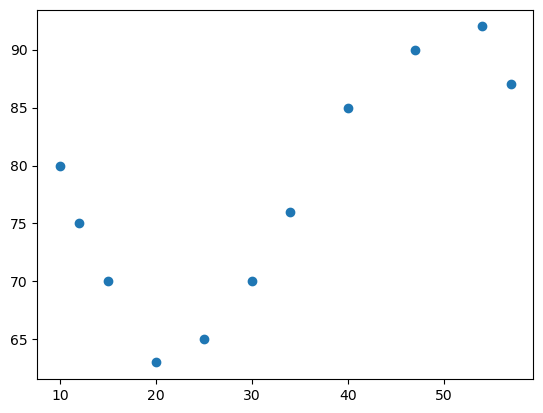

In [37]:
x = np.array([10, 12, 15, 20, 25, 30, 34, 40, 47, 54, 57])[:, np.newaxis]
y = np.array([80, 75, 70, 63, 65, 70, 76, 85, 90, 92, 87 ])

plt.scatter(x, y) # Изображаем точки на графике
plt.show()

In [65]:
pol_model = LinearRegression()
pol_cubic = PolynomialFeatures(degree=3)
X_pol_cubic = pol_cubic.fit_transform(x)    
X_pol_cubic

array([[1.00000000e+00, 1.00000000e+01, 1.00000000e+02, 1.00000000e+03,
        1.00000000e+04, 1.00000000e+05, 1.00000000e+06, 1.00000000e+07,
        1.00000000e+08, 1.00000000e+09, 1.00000000e+10],
       [1.00000000e+00, 1.20000000e+01, 1.44000000e+02, 1.72800000e+03,
        2.07360000e+04, 2.48832000e+05, 2.98598400e+06, 3.58318080e+07,
        4.29981696e+08, 5.15978035e+09, 6.19173642e+10],
       [1.00000000e+00, 1.50000000e+01, 2.25000000e+02, 3.37500000e+03,
        5.06250000e+04, 7.59375000e+05, 1.13906250e+07, 1.70859375e+08,
        2.56289062e+09, 3.84433594e+10, 5.76650391e+11],
       [1.00000000e+00, 2.00000000e+01, 4.00000000e+02, 8.00000000e+03,
        1.60000000e+05, 3.20000000e+06, 6.40000000e+07, 1.28000000e+09,
        2.56000000e+10, 5.12000000e+11, 1.02400000e+13],
       [1.00000000e+00, 2.50000000e+01, 6.25000000e+02, 1.56250000e+04,
        3.90625000e+05, 9.76562500e+06, 2.44140625e+08, 6.10351562e+09,
        1.52587891e+11, 3.81469727e+12, 9.53674316e+

In [66]:
pol_model.fit(X_pol_cubic, y)

LinearRegression()

In [67]:
y_pol_pr = pol_model.predict(pol_cubic.fit_transform(x))

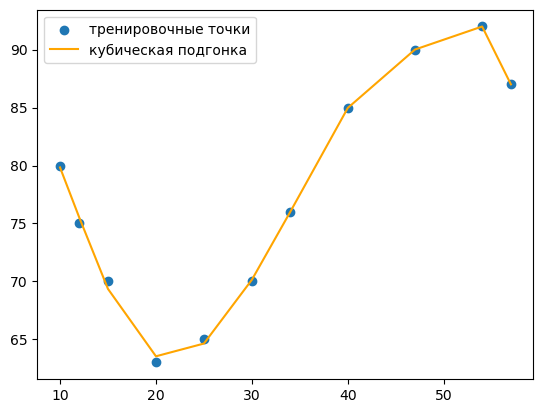

In [68]:
plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(x, y_pol_pr, label = 'кубическая подгонка', color='orange') 
plt.legend(loc='upper left') 
plt.show()

### Задание 3. Какую степень полинома вы использовали? Попробуйте изменить степень полинома, например, на 2, 5, 15? Как меняется результат?

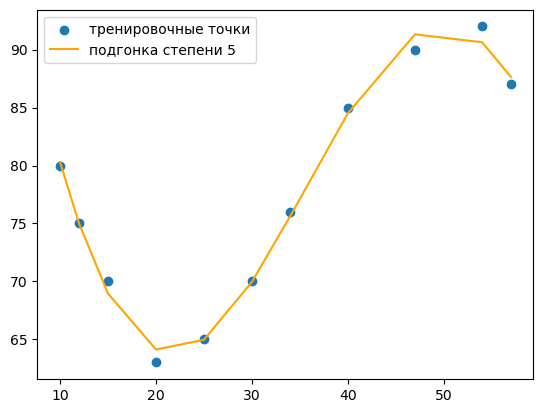

In [80]:
pol_cubic = PolynomialFeatures(degree=5)
X_pol_cubic = pol_cubic.fit_transform(x)    

pol_model.fit(X_pol_cubic, y)
y_pol_pr = pol_model.predict(pol_cubic.fit_transform(x))

plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(x, y_pol_pr, label = 'подгонка степени 5', color='orange') 
plt.legend(loc='upper left') 
plt.show()

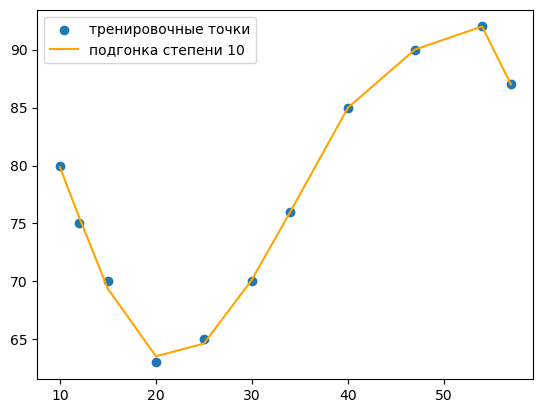

In [81]:
pol_cubic = PolynomialFeatures(degree=10)
X_pol_cubic = pol_cubic.fit_transform(x)    

pol_model.fit(X_pol_cubic, y)
y_pol_pr = pol_model.predict(pol_cubic.fit_transform(x))

plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(x, y_pol_pr, label = 'подгонка степени 10', color='orange') 
plt.legend(loc='upper left') 
plt.show()

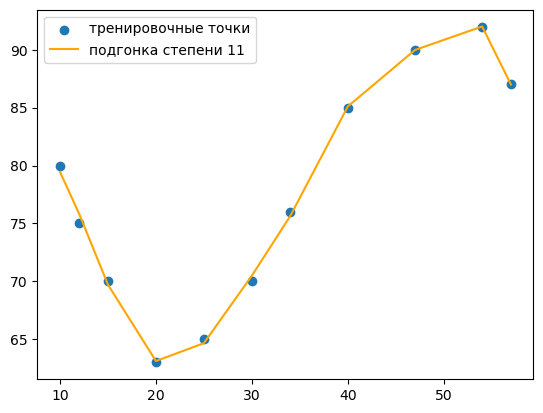

In [82]:
pol_cubic = PolynomialFeatures(degree=11)
X_pol_cubic = pol_cubic.fit_transform(x)    

pol_model.fit(X_pol_cubic, y)
y_pol_pr = pol_model.predict(pol_cubic.fit_transform(x))

plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(x, y_pol_pr, label = 'подгонка степени 11', color='orange') 
plt.legend(loc='upper left') 
plt.show()

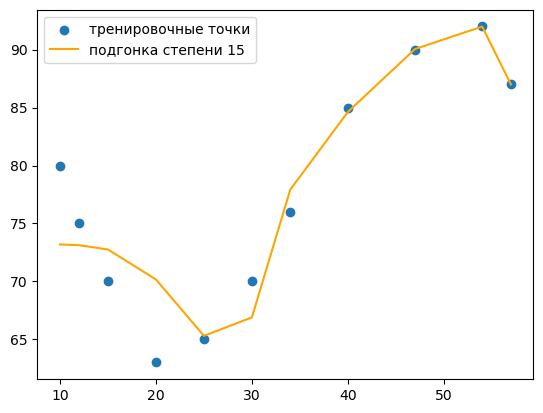

In [83]:
pol_cubic = PolynomialFeatures(degree=15)
X_pol_cubic = pol_cubic.fit_transform(x)    

pol_model.fit(X_pol_cubic, y)
y_pol_pr = pol_model.predict(pol_cubic.fit_transform(x))

plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(x, y_pol_pr, label = 'подгонка степени 15', color='orange') 
plt.legend(loc='upper left') 
plt.show()

**Вывод таков, что при степенях полинома 3 и 5 — графики практически идентичны, но не совсем точны. Наиболее точный график по точкам строится в районе степеней 10 и 11. Но начиная с 12 степени ситуация резко меняется и к 15 степени с начала отсчета график сильно съезжает.**